> Universidad del Valle de Guatemala

> CC3092 Deep Learning y Sistemas Inteligentes

> Sección 20

> 28 de julio del 2024

# Laboratorio 1: NNsimple 

Samuel Chamalé 21881, Adrian Rodriguez 21691.

cha21881@uvg.edu.gt, rod21691@uvg.edu.gt 

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Funcion de activacion
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [3]:
# Initialize parameters
def initialize_parameters(n_x, n_h, n_y, init_method='random'):
    if init_method == 'zeros':
        W1 = np.zeros((n_h, n_x))
        b1 = np.zeros((n_h, 1))
        W2 = np.zeros((n_y, n_h))
        b2 = np.zeros((n_y, 1))
    else:
        W1 = np.random.randn(n_h, n_x)
        b1 = np.random.randn(n_h, 1)
        W2 = np.random.randn(n_y, n_h)
        b2 = np.random.randn(n_y, 1)

    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    return parameters

In [4]:
def forward_prop(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {
        "A1": A1,
        "A2": A2
    }
    return A2, cache

In [5]:
# Funcion de perdida
def loss_function(A2, Y):
    m = Y.shape[1]
    cost = -np.sum(np.multiply(Y, np.log(A2)) + np.multiply(1-Y, np.log(1-A2))) / m
    cost = np.squeeze(cost)
    return cost

In [6]:
def backward_prop(X, Y, cache, parameters):
    A1 = cache["A1"]
    A2 = cache["A2"]

    W2 = parameters["W2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return grads

In [7]:
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    new_parameters = {
        "W1": W1,
        "W2": W2,
        "b1" : b1,
        "b2" : b2
    }

    return new_parameters

In [8]:
# Model function
def model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate, init_method='random'):
    parameters = initialize_parameters(n_x, n_h, n_y, init_method)
    cost_history = []

    for i in range(0, num_of_iters + 1):
        a2, cache = forward_prop(X, parameters)
        cost = loss_function(a2, Y)
        cost_history.append(cost)
        grads = backward_prop(X, Y, cache, parameters)
        parameters = update_parameters(parameters, grads, learning_rate)

        if (i % 100 == 0):
            print('Cost after iteration# {:d}: {:f}'.format(i, cost))

    return parameters, cost_history

In [9]:
def predict(X, parameters):
    a2, cache = forward_prop(X, parameters)
    yhat = a2
    yhat = np.squeeze(yhat)
    if(yhat >= 0.5):
        y_predict = 1
    else:
        y_predict = 0

    return y_predict

In [10]:
np.random.seed(2)

# The 4 training examples by columns
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])

# The outputs of the XOR for every example in X
Y = np.array([[0, 1, 1, 0]])

# No. of training examples
m = X.shape[1]

# Set the hyperparameters
n_x = 2     #No. of neurons in first layer
n_h = 2     #No. of neurons in hidden layer
n_y = 1     #No. of neurons in output layer
num_of_iters = 1000
learning_rate = 0.3

trained_parameters, _ = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate)

# Test 2X1 vector to calculate the XOR of its elements.
# Try (0, 0), (0, 1), (1, 0), (1, 1)
X_test = np.array([[1], [1]])

print(trained_parameters)

y_predict = predict(X_test, trained_parameters)

print('Neural Network prediction for example ({:d}, {:d}) is {:d}'.format(
    X_test[0][0], X_test[1][0], y_predict))

Cost after iteration# 0: 1.052558
Cost after iteration# 100: 0.695402
Cost after iteration# 200: 0.693668
Cost after iteration# 300: 0.693206
Cost after iteration# 400: 0.692966
Cost after iteration# 500: 0.692779
Cost after iteration# 600: 0.692587
Cost after iteration# 700: 0.692352
Cost after iteration# 800: 0.692030
Cost after iteration# 900: 0.691539
Cost after iteration# 1000: 0.690679
{'W1': array([[-0.59247105, -0.47282144],
       [-2.06763357, -0.23592616]]), 'W2': array([[-0.43995116, -0.16049007]]), 'b1': array([[-1.50109455],
       [-1.77729809]]), 'b2': array([[-0.56827845]])}
Neural Network prediction for example (1, 1) is 1


# Problema 1

In [11]:
np.random.seed(2)

# 1. Training with random initialization
print("Random Initialization:")
trained_parameters_random, cost_history_random = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate, 'random')
print(trained_parameters_random)

# 1. Training with zero initialization
print("\nZero Initialization:")
trained_parameters_zeros, cost_history_zeros = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate, 'zeros')
print(trained_parameters_zeros)

Random Initialization:
Cost after iteration# 0: 1.052558
Cost after iteration# 100: 0.695402
Cost after iteration# 200: 0.693668
Cost after iteration# 300: 0.693206
Cost after iteration# 400: 0.692966
Cost after iteration# 500: 0.692779
Cost after iteration# 600: 0.692587
Cost after iteration# 700: 0.692352
Cost after iteration# 800: 0.692030
Cost after iteration# 900: 0.691539
Cost after iteration# 1000: 0.690679
{'W1': array([[-0.59247105, -0.47282144],
       [-2.06763357, -0.23592616]]), 'W2': array([[-0.43995116, -0.16049007]]), 'b1': array([[-1.50109455],
       [-1.77729809]]), 'b2': array([[-0.56827845]])}

Zero Initialization:
Cost after iteration# 0: 0.693147
Cost after iteration# 100: 0.693147
Cost after iteration# 200: 0.693147
Cost after iteration# 300: 0.693147
Cost after iteration# 400: 0.693147
Cost after iteration# 500: 0.693147
Cost after iteration# 600: 0.693147
Cost after iteration# 700: 0.693147
Cost after iteration# 800: 0.693147
Cost after iteration# 900: 0.69314

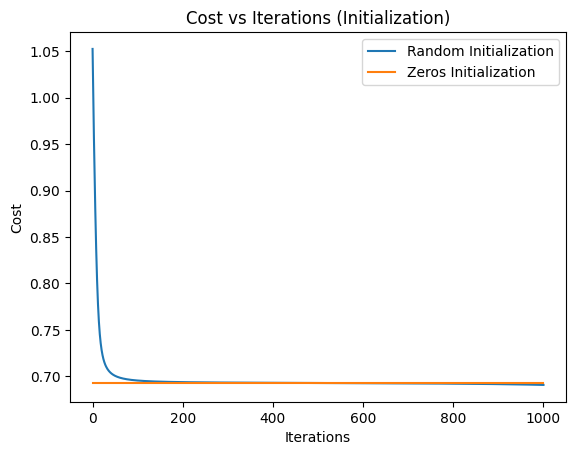

In [12]:
plt.plot(cost_history_random, label='Random Initialization')
plt.plot(cost_history_zeros, label='Zeros Initialization')
plt.title('Cost vs Iterations (Initialization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()

# Problema 2


Training with learning rate: 0.01
Cost after iteration# 0: 1.052558
Cost after iteration# 100: 0.948307
Cost after iteration# 200: 0.864690
Cost after iteration# 300: 0.803459
Cost after iteration# 400: 0.765007
Cost after iteration# 500: 0.742498
Cost after iteration# 600: 0.729047
Cost after iteration# 700: 0.720556
Cost after iteration# 800: 0.714882
Cost after iteration# 900: 0.710898
Cost after iteration# 1000: 0.707985

Training with learning rate: 0.1
Cost after iteration# 0: 1.013592
Cost after iteration# 100: 0.674649
Cost after iteration# 200: 0.629729
Cost after iteration# 300: 0.590321
Cost after iteration# 400: 0.561134
Cost after iteration# 500: 0.540238
Cost after iteration# 600: 0.524827
Cost after iteration# 700: 0.512317
Cost after iteration# 800: 0.498693
Cost after iteration# 900: 0.452745
Cost after iteration# 1000: 0.312239

Training with learning rate: 0.5
Cost after iteration# 0: 0.713866
Cost after iteration# 100: 0.637009
Cost after iteration# 200: 0.531485
C

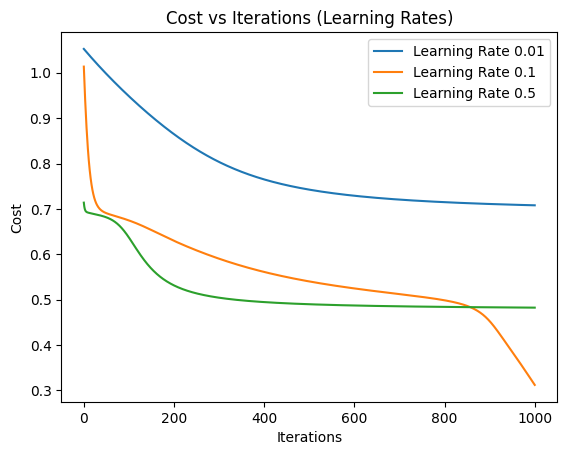

In [13]:
np.random.seed(2)

learning_rates = [0.01, 0.1, 0.5]
cost_histories_lr = {}
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    _, cost_histories_lr[lr] = model(X, Y, n_x, n_h, n_y, num_of_iters, lr)

for lr in learning_rates:
    plt.plot(cost_histories_lr[lr], label=f'Learning Rate {lr}')
plt.title('Cost vs Iterations (Learning Rates)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()

# Problema 3

In [14]:
def mse_loss_function(A2, Y):
    cost = np.mean(np.square(Y - A2))
    return cost

def backward_prop_mse(X, Y, cache, parameters):
    m = X.shape[1]
    A1 = cache["A1"]
    A2 = cache["A2"]

    W2 = parameters["W2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }
    return grads

def model_mse(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate):
    parameters = initialize_parameters(n_x, n_h, n_y)
    cost_history = []

    for i in range(0, num_of_iters + 1):
        a2, cache = forward_prop(X, parameters)
        cost = mse_loss_function(a2, Y)
        cost_history.append(cost)
        grads = backward_prop_mse(X, Y, cache, parameters)
        parameters = update_parameters(parameters, grads, learning_rate)

        if (i % 100 == 0):
            print('MSE Cost after iteration# {:d}: {:f}'.format(i, cost))

    return parameters, cost_history

In [16]:
np.random.seed(2)

print("Random Initialization:")
trained_parameters_random, cost_history_random = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate, 'random')
print(trained_parameters_random)

print("\nTraining with MSE cost function:")
trained_parameters_mse, cost_history_mse = model_mse(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate)

Random Initialization:
Cost after iteration# 0: 1.052558
Cost after iteration# 100: 0.695402
Cost after iteration# 200: 0.693668
Cost after iteration# 300: 0.693206
Cost after iteration# 400: 0.692966
Cost after iteration# 500: 0.692779
Cost after iteration# 600: 0.692587
Cost after iteration# 700: 0.692352
Cost after iteration# 800: 0.692030
Cost after iteration# 900: 0.691539
Cost after iteration# 1000: 0.690679
{'W1': array([[-0.59247105, -0.47282144],
       [-2.06763357, -0.23592616]]), 'W2': array([[-0.43995116, -0.16049007]]), 'b1': array([[-1.50109455],
       [-1.77729809]]), 'b2': array([[-0.56827845]])}

Training with MSE cost function:
MSE Cost after iteration# 0: 0.368460
MSE Cost after iteration# 100: 0.202853
MSE Cost after iteration# 200: 0.179058
MSE Cost after iteration# 300: 0.153107
MSE Cost after iteration# 400: 0.016892
MSE Cost after iteration# 500: 0.004034
MSE Cost after iteration# 600: 0.001709
MSE Cost after iteration# 700: 0.000926
MSE Cost after iteration# 

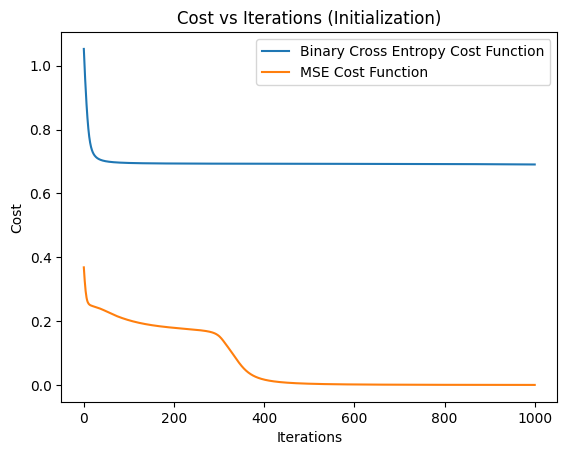

In [20]:
plt.plot(cost_history_random, label='Binary Cross Entropy Cost Function')
plt.plot(cost_history_mse, label='MSE Cost Function')
plt.title('Cost vs Iterations (Initialization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()